### [Bayesian inference with Stan: A tutorial on adding custom distributions](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5149118/)

In [1]:
library(rstan)

Loading required package: StanHeaders


rstan version 2.32.5 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)




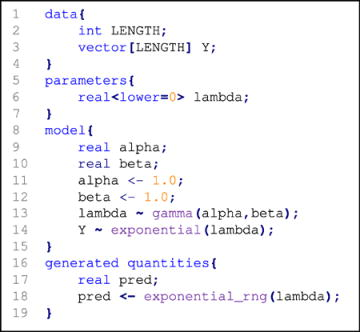

In [2]:
rm(list=ls())

In [6]:
data = rexp(500, 1)

In [8]:
len = length(data)

In [9]:
model <- stan_model('./exponential.stan')

In [14]:
fit <- sampling(model,
                data = list(LEN = len, y=data),
                iter = 1000,
                warmup = 500,
                chains = 4,
                seed = 0)


SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.007 seconds (Warm-up)
Chain 1:                0.005 seconds (Sampling)
Chain 1:                0.012 seconds (To

In [18]:
print(fit)

Inference for Stan model: anon_model.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

          mean se_mean   sd    2.5%     25%     50%     75%   97.5% n_eff Rhat
lambda    1.03    0.00 0.05    0.94    1.00    1.03    1.06    1.13   789 1.01
pred      0.97    0.02 0.94    0.03    0.29    0.70    1.36    3.58  1952 1.00
lp__   -486.00    0.02 0.76 -488.19 -486.15 -485.70 -485.54 -485.50  1062 1.00

Samples were drawn using NUTS(diag_e) at Tue Jan 23 14:42:44 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


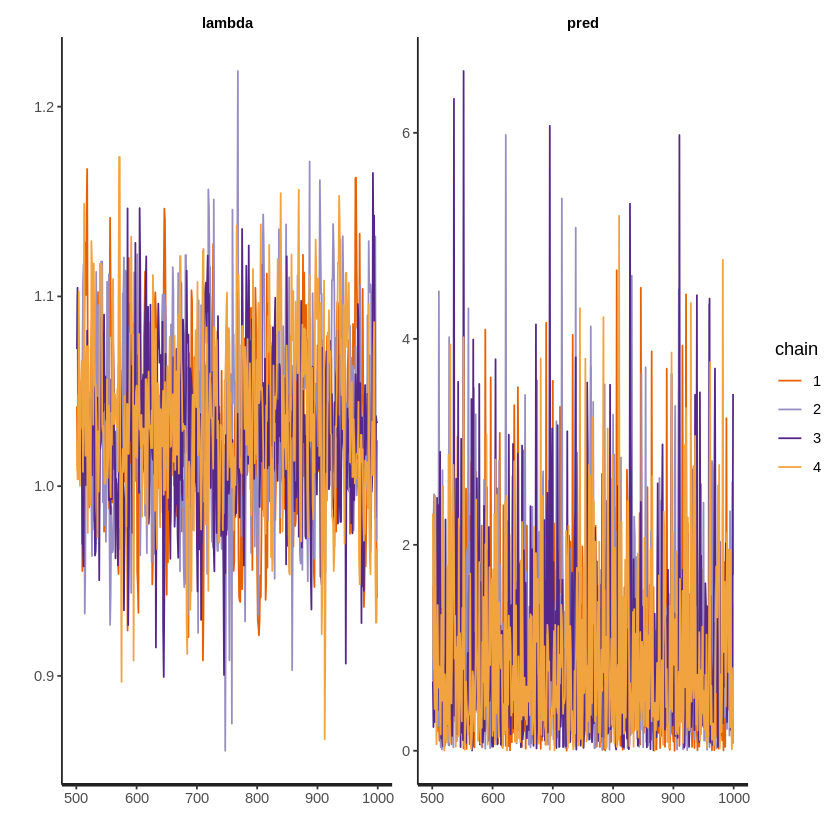

In [19]:
traceplot(fit)

ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



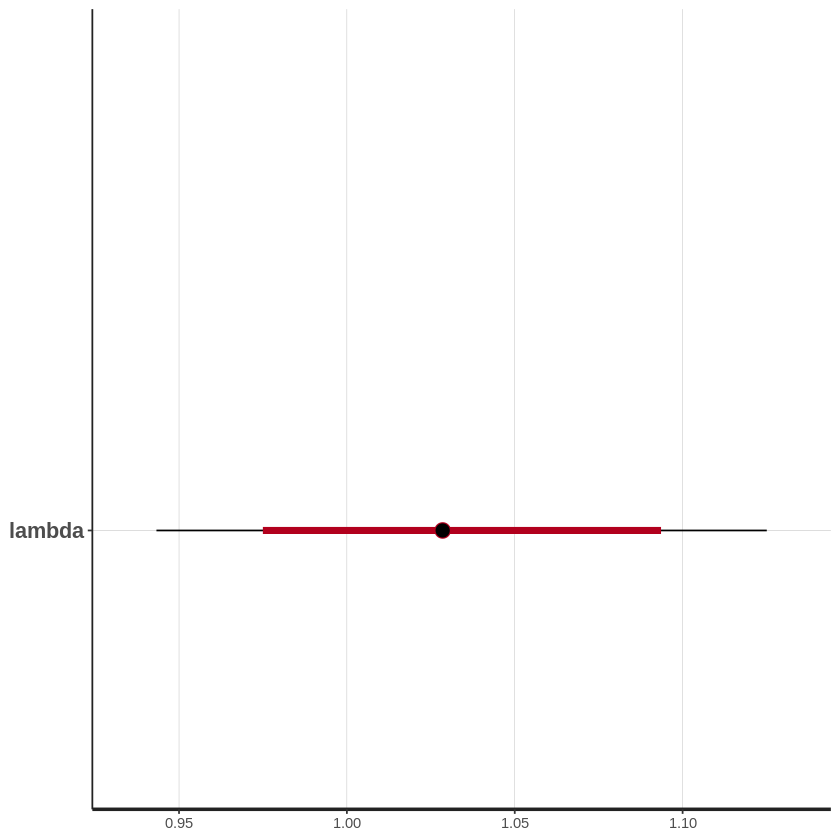

In [21]:
stan_plot(fit, pars = c('lambda'))